A Stacking Ensemble Learning Model for Rainfall Prediction

In [39]:
#Imports necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
import joblib

In [40]:
# Load your data
df = pd.read_csv("RAINFALL DATA.csv")

In [41]:
# Displays the first few rows of the DataFrame
df.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,...,STP_ATTRIBUTES,VISIB,VISIB_ATTRIBUTES,WDSP,WDSP_ATTRIBUTES,MXSPD,GUST,MAX,MIN,PRCP
0,43279099999,01-01-2019,12.994414,80.180517,15.84,"CHENNAI INTERNATIONAL, IN",74.9,24,63.0,24,...,0,3.0,24,5.4,24,12.0,18.1,82.9,64.0,0.0
1,43279099999,02-01-2019,12.994414,80.180517,15.84,"CHENNAI INTERNATIONAL, IN",75.9,24,65.7,24,...,0,3.0,24,4.2,24,12.0,NaN,84.2,66.7,0.0
2,43279099999,03-01-2019,12.994414,80.180517,15.84,"CHENNAI INTERNATIONAL, IN",75.9,24,66.5,24,...,0,2.0,24,5.0,24,9.9,NaN,86.0,66.6,0.0
3,43279099999,04-01-2019,12.994414,80.180517,15.84,"CHENNAI INTERNATIONAL, IN",76.5,24,66.9,24,...,0,2.5,24,5.1,24,13.0,NaN,86.0,67.3,0.0
4,43279099999,05-01-2019,12.994414,80.180517,15.84,"CHENNAI INTERNATIONAL, IN",76.6,24,67.2,24,...,0,2.5,24,4.0,24,11.1,NaN,85.1,67.8,0.0


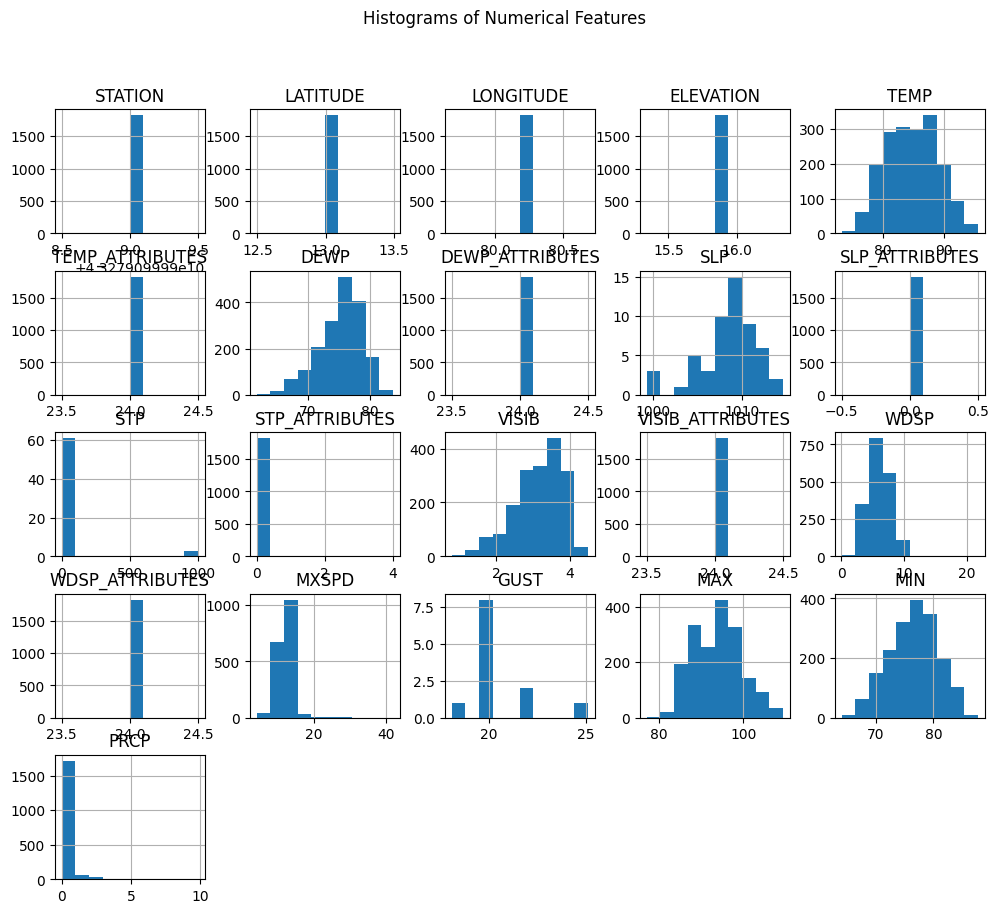

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [43]:
# Check for missing values
print(df.isnull().sum())  


STATION                0
DATE                   0
LATITUDE               0
LONGITUDE              0
ELEVATION              0
NAME                   0
TEMP                   0
TEMP_ATTRIBUTES        0
DEWP                   0
DEWP_ATTRIBUTES        0
SLP                 1769
SLP_ATTRIBUTES         0
STP                 1759
STP_ATTRIBUTES         0
VISIB                  0
VISIB_ATTRIBUTES       0
WDSP                   0
WDSP_ATTRIBUTES        0
MXSPD                  0
GUST                1811
MAX                    0
MIN                    0
PRCP                   0
dtype: int64


In [44]:
# Impute missing values in specific columns with mean strategy
imputer = SimpleImputer(strategy="mean")  


In [45]:
# Select columns to impute
columns_to_impute = ["SLP", "STP", "GUST"]  
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

In [46]:
# Check for missing values after imputation
print(df.isnull().sum())

STATION             0
DATE                0
LATITUDE            0
LONGITUDE           0
ELEVATION           0
NAME                0
TEMP                0
TEMP_ATTRIBUTES     0
DEWP                0
DEWP_ATTRIBUTES     0
SLP                 0
SLP_ATTRIBUTES      0
STP                 0
STP_ATTRIBUTES      0
VISIB               0
VISIB_ATTRIBUTES    0
WDSP                0
WDSP_ATTRIBUTES     0
MXSPD               0
GUST                0
MAX                 0
MIN                 0
PRCP                0
dtype: int64


In [47]:
# Convert the 'DATE' column to a datetime format
df['DATE'] = pd.to_datetime(df['DATE'], format="%d-%m-%Y")

#Extract the year, month, and day components into separate columns
df['year'] = df['DATE'].dt.year
df['month'] = df['DATE'].dt.month
df['day'] = df['DATE'].dt.day


In [48]:
# Initial set of features is defined
features = ["day", "month", "year", "STATION", "LATITUDE", "LONGITUDE", "ELEVATION", "TEMP", "TEMP_ATTRIBUTES","DEWP", "DEWP_ATTRIBUTES", "SLP","SLP_ATTRIBUTES", "STP","GUST","STP_ATTRIBUTES", "VISIB", "VISIB_ATTRIBUTES", "WDSP", "WDSP_ATTRIBUTES", "MXSPD", "MAX", "MIN"]
target = "PRCP"

In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [50]:
# Create a Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the Decision Tree Regressor model to the training data
dt_model.fit(X_train, y_train)

# Save the trained Decision Tree Regressor model to a file
joblib.dump(dt_model, 'dt_model.pkl')

['dt_model.pkl']

All Features with Importance:
day: 0.06773828029319262
month: 0.02948618958531015
year: 0.04136689696028095
STATION: 0.0
LATITUDE: 0.0
LONGITUDE: 0.0
ELEVATION: 0.0
TEMP: 0.08078403968924196
TEMP_ATTRIBUTES: 0.0
DEWP: 0.129809722590146
DEWP_ATTRIBUTES: 0.0
SLP: 8.148432679840975e-05
SLP_ATTRIBUTES: 0.0
STP: 0.00014976383374679081
GUST: 0.0
STP_ATTRIBUTES: 0.0
VISIB: 0.12394958989782852
VISIB_ATTRIBUTES: 0.0
WDSP: 0.221693042214633
WDSP_ATTRIBUTES: 0.0
MXSPD: 0.027791944622572527
MAX: 0.1294654599355327
MIN: 0.14768358605071633


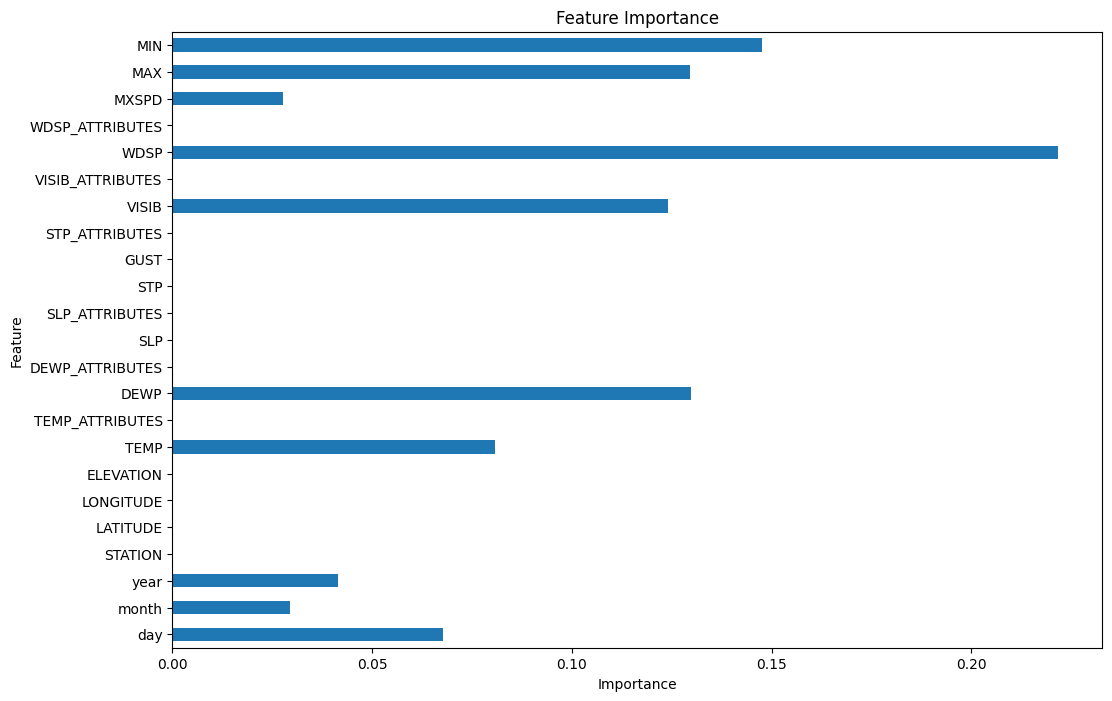

In [51]:
# Get features importances
feature_importance = pd.Series(dt_model.feature_importances_, index=features)

# Print all features with their importance values
print("All Features with Importance:")
for feature, importance in feature_importance.items():
    print(f"{feature}: {importance}")

# Plot all features
plt.figure(figsize=(12, 8))
feature_importance.plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Top Features:
WDSP: 0.221693042214633
MIN: 0.14768358605071633
DEWP: 0.129809722590146
MAX: 0.1294654599355327
VISIB: 0.12394958989782852
TEMP: 0.08078403968924196
day: 0.06773828029319262
year: 0.04136689696028095
month: 0.02948618958531015
MXSPD: 0.027791944622572527
STP: 0.00014976383374679081
SLP: 8.148432679840975e-05
ELEVATION: 0.0
TEMP_ATTRIBUTES: 0.0
LONGITUDE: 0.0
DEWP_ATTRIBUTES: 0.0
SLP_ATTRIBUTES: 0.0
GUST: 0.0
STP_ATTRIBUTES: 0.0
LATITUDE: 0.0
VISIB_ATTRIBUTES: 0.0
STATION: 0.0
WDSP_ATTRIBUTES: 0.0


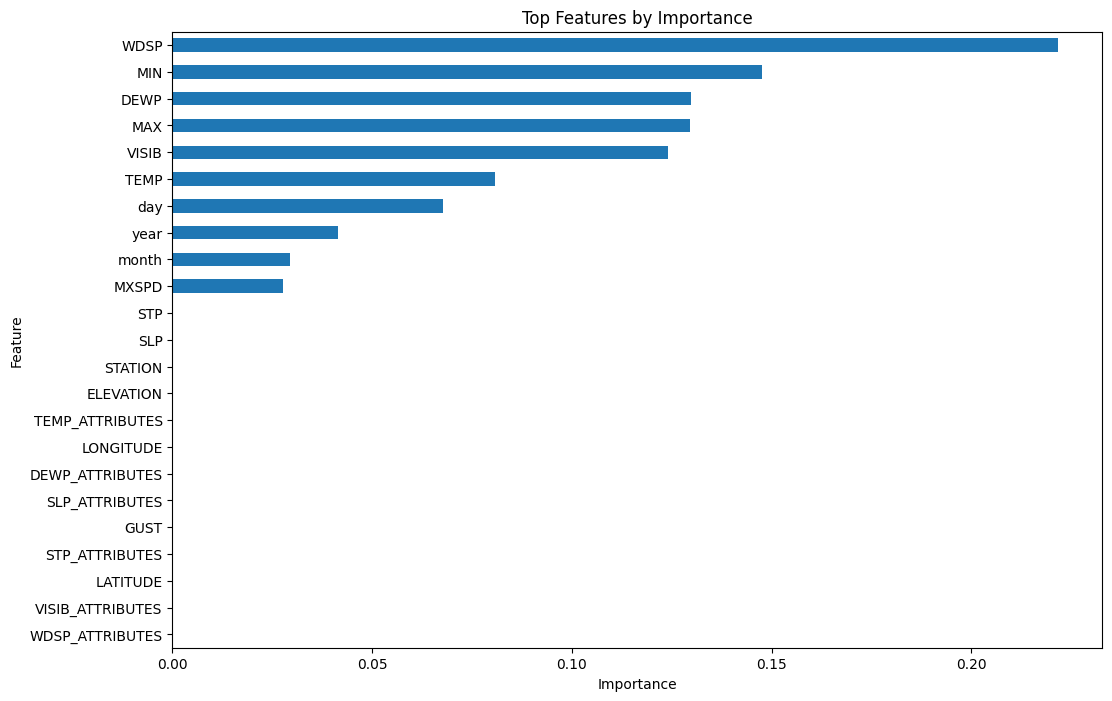

In [52]:
# Select all features
top_features = feature_importance.sort_values(ascending=False)

# Print the top features
print("Top Features:")
for feature, importance in top_features.items():
    print(f"{feature}: {importance}")

# Sort the top features in descending order
top_features_sorted = top_features.sort_values(ascending=True)

# Plot the top features
plt.figure(figsize=(12, 8))
top_features_sorted.plot(kind='barh')
plt.title('Top Features by Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [53]:
features = ["TEMP", "DEWP", "VISIB", "WDSP", "MXSPD", "MAX", "MIN", "day", "month","year"]
target = "PRCP"
X = df[features]
y = df[target]


In [54]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Define the base models
rf_model = RandomForestRegressor(random_state=42)
catboost_model = CatBoostRegressor(random_state=42, silent=True)
xgb_model = XGBRegressor(random_state=42, silent=True)
lgbm_model = LGBMRegressor(random_state=42, silent=True)

In [56]:
# Define hyperparameter tuning for each base model using GridSearchCV
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 3, 4, 5]
}

xgb_params = {
    'n_estimators': [50,100,150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}

catboost_params = {
    'iterations': [50,100,150],
    'learning_rate': [0.01, 0.1, 0.5],
    'depth': [3, 4, 5]
}

lgbm_params = {
    'n_estimators': [50,100,150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}

In [57]:
# Perform grid search cross-validation on Random Forest model
rf_gs = GridSearchCV(rf_model, rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform grid search cross-validation on XGBoost model
xgb_gs = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform grid search cross-validation on CatBoost model
catboost_gs = GridSearchCV(catboost_model, catboost_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform grid search cross-validation on LightGBM model
lgbm_gs = GridSearchCV(lgbm_model, lgbm_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [58]:
# Fit the Random Forest model using grid search cross-validation
rf_gs.fit(X_train, y_train)

# Fit the XGBoost model using grid search cross-validation
xgb_gs.fit(X_train, y_train)

# Fit the catboost model using grid search cross-validation
catboost_gs.fit(X_train, y_train)

# Fit the LightGBM model using grid search cross-validation
lgbm_gs.fit(X_train, y_train)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:51:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 717
[LightGBM] [Info] Number of data points in the train set: 1458, number of used features: 10
[LightGBM] [Info] Start training from score 0.182840
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=42, silent=True),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [59]:
# Print the best parameters found by each GridSearchCV object
print("Random Forest Best Parameters:", rf_gs.best_params_)
print("XGBoost Best Parameters:", xgb_gs.best_params_)
print("CatBoost Best Parameters:", catboost_gs.best_params_)
print("LightGBM Best Parameters:", lgbm_gs.best_params_)

Random Forest Best Parameters: {'max_depth': None, 'n_estimators': 50}
XGBoost Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
CatBoost Best Parameters: {'depth': 3, 'iterations': 150, 'learning_rate': 0.1}
LightGBM Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}


In [60]:
joblib.dump(rf_gs.best_estimator_, 'rf_model.pkl')
joblib.dump(xgb_gs.best_estimator_, 'xgb_model.pkl')
joblib.dump(catboost_gs.best_estimator_, 'catboost_model.pkl')
joblib.dump(lgbm_gs.best_estimator_, 'lgbm_model.pkl')

['lgbm_model.pkl']

In [61]:
# Use the best model to make predictions on the test set
rf_pred = rf_gs.best_estimator_.predict(X_test)
xgb_pred = xgb_gs.best_estimator_.predict(X_test)
catboost_pred = catboost_gs.best_estimator_.predict(X_test)
lgbm_pred = lgbm_gs.best_estimator_.predict(X_test)

[LightGBM] [Warning] Unknown parameter: silent


In [62]:
# Calculate the performance metrics for the Random Forest model
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Print the performance metrics for the Random Forest model
print("Random Forest  MAE:", rf_mae, "MSE:", rf_mse, "R-squared:", rf_r2)

Random Forest  MAE: 0.201598904109589 MSE: 0.25709478115068496 R-squared: 0.4427647601427537


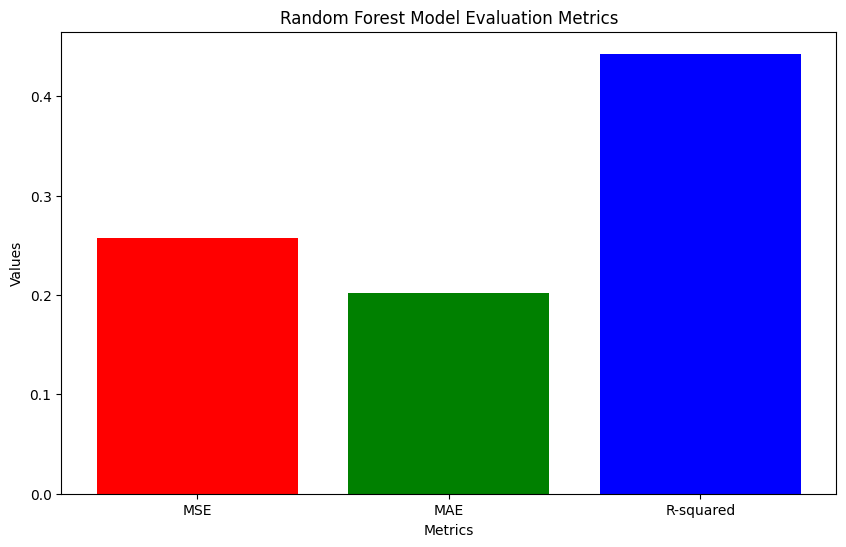

In [63]:
# Bar chart data
labels = ['MSE', 'MAE', 'R-squared']
values = [rf_mse, rf_mae, rf_r2]

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['red', 'green', 'blue'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Random Forest Model Evaluation Metrics')
plt.show()

In [64]:
# Calculate the performance metrics for the XGBoost model
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

# Print the performance metrics for the XGBoost model
print("XGBoost MAE:", xgb_mae, "MSE:", xgb_mse, "R-squared:", xgb_r2)


XGBoost MAE: 0.19506802588076755 MSE: 0.20496139989874188 R-squared: 0.5557602751682768


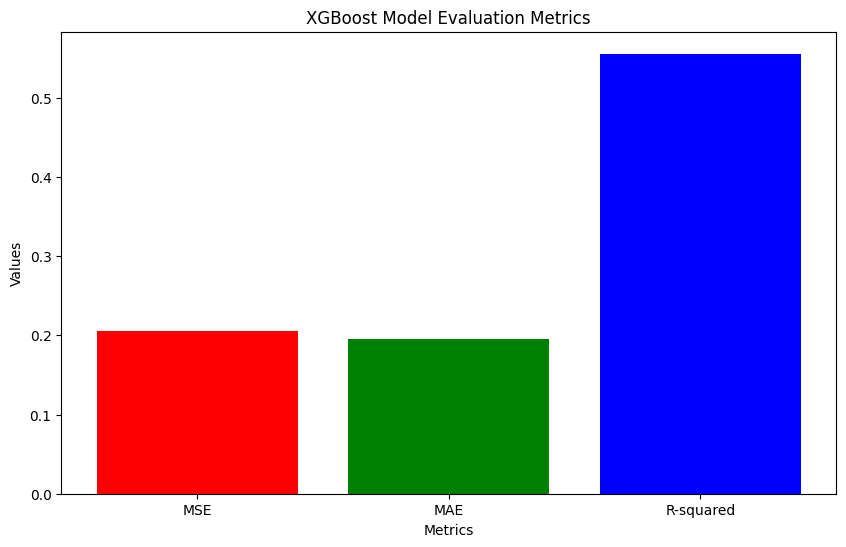

In [65]:
# Bar chart data
labels = ['MSE', 'MAE', 'R-squared']
values = [xgb_mse, xgb_mae, xgb_r2]

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['red', 'green', 'blue'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('XGBoost Model Evaluation Metrics')
plt.show()

In [66]:
# Calculate the performance metrics for the catboost model
catboost_mae = mean_absolute_error(y_test, catboost_pred)
catboost_mse = mean_squared_error(y_test, catboost_pred)
catboost_r2 = r2_score(y_test, catboost_pred)

# Print the performance metrics for the catboost model
print("Catboost MAE:", catboost_mae, "MSE:", catboost_mse, "R-squared:", catboost_r2)

Catboost MAE: 0.20541317126319836 MSE: 0.241298247157909 R-squared: 0.47700266014593784


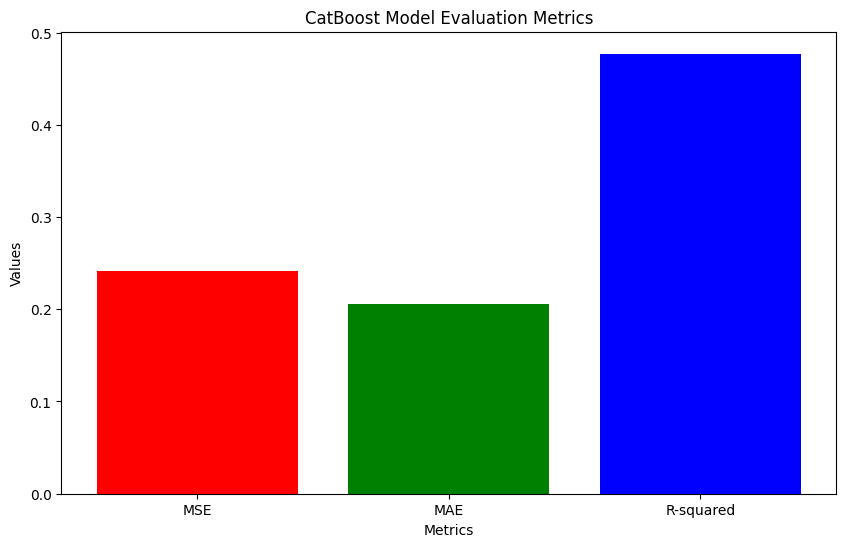

In [67]:
# Bar chart data
labels = ['MSE', 'MAE', 'R-squared']
values = [catboost_mse, catboost_mae, catboost_r2]

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['red', 'green', 'blue'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('CatBoost Model Evaluation Metrics')
plt.show()


In [68]:
# Calculate the performance metrics for the LightGBM model
lgbm_mae = mean_absolute_error(y_test, lgbm_pred)
lgbm_mse = mean_squared_error(y_test, lgbm_pred)
lgbm_r2 = r2_score(y_test, lgbm_pred)

# Print the performance metrics for the XGBoost model
print("LightGBM MAE:", lgbm_mae, "MSE:", lgbm_mse, "R-squared:", lgbm_r2)

LightGBM MAE: 0.22500799543496464 MSE: 0.26056113889785393 R-squared: 0.43525166834824314


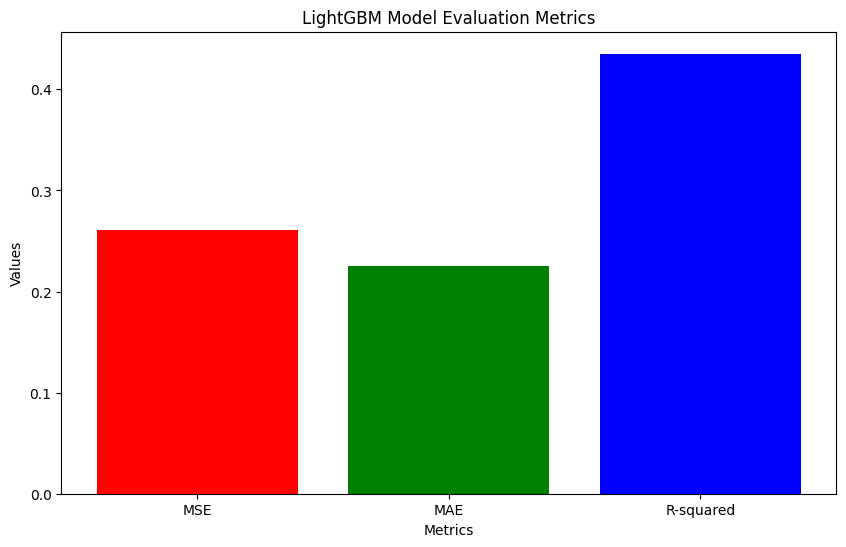

In [69]:
# Bar chart data
labels = ['MSE', 'MAE', 'R-squared']
values = [lgbm_mse, lgbm_mae, lgbm_r2]

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['red', 'green', 'blue'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('LightGBM Model Evaluation Metrics')
plt.show()

In [70]:
# Create a new feature by stacking the predictions of the base models for the test set
X_test_stacked = np.column_stack((rf_pred, xgb_pred, catboost_pred, lgbm_pred))


In [71]:
# Define the meta-regressor
meta_regressor = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1)



In [72]:
# Fit the meta-regressor on the stacked features
meta_regressor.fit(X_test_stacked, y_test)

# Save the meta-regressor model
joblib.dump(meta_regressor, 'meta_model.pkl')




['meta_model.pkl']

In [73]:
# Use the meta-regressor model to make predictions on the test set
meta_pred_test = meta_regressor.predict(X_test_stacked)



In [74]:
# Calculate MSE, MAE, and R-squared for the meta model on the test set
meta_mse_test = mean_squared_error(y_test, meta_pred_test)
meta_mae_test = mean_absolute_error(y_test, meta_pred_test)
meta_r2_test = r2_score(y_test, meta_pred_test)

print("Mean Squared Error (MSE) for the meta model on the test set:", meta_mse_test)
print("Mean Absolute Error (MAE) for the meta model on the test set:", meta_mae_test)
print("R-squared for the meta model on the test set:", meta_r2_test)



Mean Squared Error (MSE) for the meta model on the test set: 0.012674711047138713
Mean Absolute Error (MAE) for the meta model on the test set: 0.058829175402265774
R-squared for the meta model on the test set: 0.9725284363266243


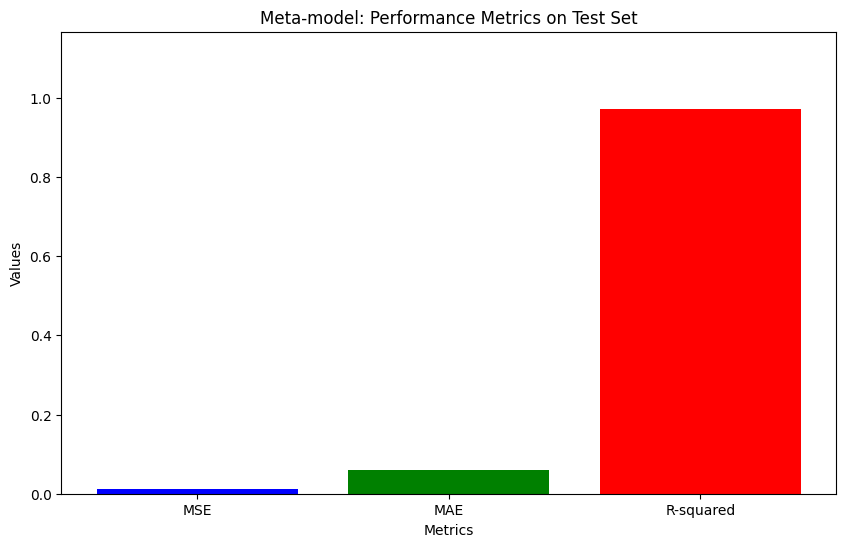

In [75]:
# Plot performance metrics for the meta model
metrics = ['MSE', 'MAE', 'R-squared']
values = [meta_mse_test, meta_mae_test, meta_r2_test]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Meta-model: Performance Metrics on Test Set')
plt.ylim(0, max(values) * 1.2)
plt.show()



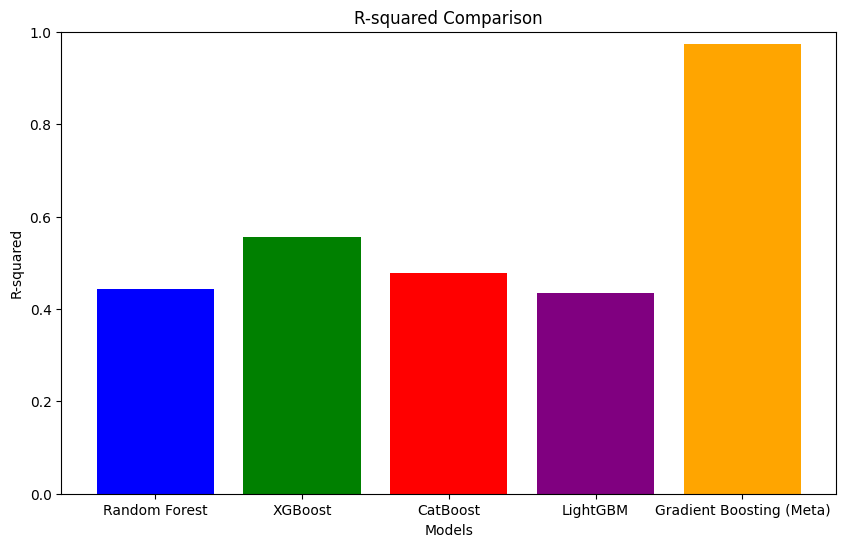

In [76]:
# R-squared values
models = ['Random Forest', 'XGBoost', 'CatBoost', 'LightGBM', 'Gradient Boosting (Meta)']
r_squared_values = [rf_r2, xgb_r2, catboost_r2, lgbm_r2, meta_r2_test]

plt.figure(figsize=(10, 6))
plt.bar(models, r_squared_values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('R-squared Comparison')
plt.ylim(0, 1)
plt.show()